In [1]:
# !pip install tensorflow # Install it if it isn't already

In [2]:
import tensorflow as tf # tf is shorthand for tensorflow

# What you need to train a model:
1.   Define your dataset
2.   Choose your metric 
3.   Define your model
4.   Define your loss (if needed)
5.   Compile your model with a loss, metric, optimizer, learning rate\dots
6.   Fit your model
7.   Save and/or load your model

## Define your dataset

In [3]:
# Works
dataset = tf.data.Dataset.from_tensor_slices((tf.zeros([32, 4]), tf.zeros([32, 5])))

In [4]:
# Doesn't work
dataset = tf.data.Dataset.from_tensor_slices(tf.zeros([32, 3]), (tf.zeros([32, 4]), tf.zeros([32, 5])))

AttributeError: ignored

In [5]:
# Dictionary
dataset = tf.data.Dataset.from_tensor_slices({"hi": tf.zeros([32, 4]), "bye": tf.zeros([32, 5])})

In [6]:
# One tensor
dataset = tf.data.Dataset.from_tensor_slices(tf.zeros([32, 3]))

In [7]:
# Our dataset
X = tf.constant([[1, 1], [2, 1], [2, 2], [1, 2]])
Y = tf.constant([[1], [0], [1], [0]])
dataset = tf.data.Dataset.from_tensor_slices((X, Y))

In [8]:
dataset = dataset.batch(2)

## Choose your metric

In [9]:
example_metric = tf.keras.metrics.BinaryAccuracy()

## Define your model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="elu"), # Using ELU instead of ReLU to make it more robust and to get rid of dying relu problem.
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [11]:
model

In [12]:
model.layers

In [13]:
model.call(tf.zeros([3, 2]))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.5],
       [0.5],
       [0.5]], dtype=float32)>

## Defining a loss (Optional)

In [14]:
loss = tf.keras.losses.BinaryCrossentropy()

## Compiling your model

In [15]:
model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(0.1), metrics=tf.keras.metrics.BinaryAccuracy()) # 0.1 is the learning rate

## Fit your model

In [16]:
model.fit(dataset, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 6ms/step - loss: 0.8352 - binary_accuracy: 0.5000
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.7252 - binary_accuracy: 0.5000
Epoch 3/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.7554 - binary_accuracy: 0.5000
Epoch 4/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.7414 - binary_accuracy: 0.5000
Epoch 5/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.7135 - binary_accuracy: 0.5000
Epoch 6/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6973 - binary_accuracy: 0.2500
Epoch 7/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.6981 - binary_accuracy: 0.5000
Epoch 8/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.7059 - binary_accuracy: 0.5000
Epoch 9/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.7089 - binary_accuracy: 0.5000
Epoch 10/1000
2/2 [==============================] -

In [17]:
# Same as passing in dataset
model.fit(X, Y, epochs=1000, batch_size=2)

Epoch 1/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.7244e-04 - binary_accuracy: 1.0000
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7194e-04 - binary_accuracy: 1.0000
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7256e-04 - binary_accuracy: 1.0000
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7133e-04 - binary_accuracy: 1.0000
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7100e-04 - binary_accuracy: 1.0000
Epoch 6/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7168e-04 - binary_accuracy: 1.0000
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7109e-04 - binary_accuracy: 1.0000
Epoch 8/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6986e-04 - binary_accuracy: 1.0000
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7029e-04 - binary_accuracy: 1.0000
Epoch 10/1000
2/2 [

## Save and/or load your model

In [18]:
model.save("my_model") # Save to folder

INFO:tensorflow:Assets written to: my_model/assets


In [19]:
model.save("my_model.hdf5") # Save to HDF5 file

In [20]:
new_model = tf.keras.models.load_model("my_model") # From folder

In [21]:
new_model = tf.keras.models.load_model("my_model.hdf5") # From HDF5 file

In [22]:
new_model.call(tf.zeros([3, 2]))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.99996996],
       [0.99996996],
       [0.99996996]], dtype=float32)>

# Defining your dataset

## Using a TFRecord Dataset

In [23]:
#@title Code for generating my_tfr.tfr
with tf.io.TFRecordWriter("my_tfr.tfr") as writer:
  example = tf.train.Example()
  feature = example.features.feature
  feature["bye"].bytes_list.value[:] = ["This is how you look at one element".encode('utf-8')]
  feature["hi"].float_list.value[:] = [1.23, 4.56, 7.89]
  writer.write(example.SerializeToString())

  example2 = tf.train.Example()
  feature = example2.features.feature
  feature["bye"].bytes_list.value[:] = ["This is the second example".encode('utf-8')]
  feature["hi"].float_list.value[:] = [3.14, 2.718, 1.618]
  writer.write(example2.SerializeToString())

In [24]:
dataset = tf.data.TFRecordDataset("my_tfr.tfr") # Create dataset like so. The "my_tfr.tfr" file is in the Github repository

In [25]:
for i, data in enumerate(dataset):
    print(data)
    break # Common trick for only printing the first item to take a look at it

tf.Tensor(b"\nH\n.\n\x03bye\x12'\n%\n#This is how you look at one element\n\x16\n\x02hi\x12\x10\x12\x0e\n\x0c\xa4p\x9d?\x85\xeb\x91@\xe1z\xfc@", shape=(), dtype=string)


In [26]:
feature_desc = {"hi": tf.io.FixedLenFeature([3,], dtype=tf.float32),
                "bye": tf.io.VarLenFeature(dtype=tf.string)}
for i, data in enumerate(dataset):
    print(tf.io.parse_single_example(data, feature_desc))
    break

{'bye': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x7ff729a30ad0>, 'hi': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.23, 4.56, 7.89], dtype=float32)>}


In [27]:
file_pattern = "my_tfr*" # Put file pattern here
files = tf.data.Dataset.list_files(file_pattern)

In [28]:
dataset = files.map(lambda x: tf.data.TFRecordDataset(x)) # dataset is just a normal tf.data.Dataset now!

## Writing a TFR

In [30]:
with tf.io.TFRecordWriter("path here") as writer:
    # Put example generation code here
    writer.write(example.SerializeToString())

In [29]:
# Create example
example = tf.train.Example()

In [30]:
feature = example.features.feature

In [31]:
with tf.io.TFRecordWriter("my_new_tfr.tfr") as writer: # Use tf.io.TFRecordWriter as writer
    for i in range(26):
        example = tf.train.Example() # Create a tf.train.example
        feature = example.features.feature # Feature step
        feature["letter"].bytes_list.value[:] = [tf.compat.as_bytes(chr(i+97))] # bytes feature, chr(i+97) is used to convert number to letter in alphabet
        feature["integer"].int64_list.value[:] = [i] # integer value feature
        feature["float"].float_list.value[:] = [float(i)] # float value feature
        writer.write(example.SerializeToString()) # write example after serializing to string

# Choose your metric

In [32]:
def my_mae(y_true, y_pred):
    """
    Parameters:
        y_true: tensor of shape (B, K)
        y_pred: tensor of shape (B, K)
    Returns:
        tensor of shape (B,) with metric value for each example
    """
    abs_dist = tf.math.abs(y_true - y_pred)
    return tf.reduce_mean(abs_dist, axis=-1)

In [33]:
class MyCategoricalAccuracy(tf.keras.metrics.Metric):
    def __init__(self, name="my_categorical_accuracy"):
        super().__init__()
        self.correct = self.add_weight(name="correct", initializer="zeros", dtype=tf.int32)
        self.count = self.add_weight(name="count", initializer="zeros", dtype=tf.int32)

    def update_state(self, labels, preds, sample_weight=None):
        """
        labels: shape (B, K)
        preds: shape (B, K)
        """
        self.count.assign_add(tf.shape(labels)[0]) # assign_add is essentially +=, tf.shape(labels)[0] is the batch size
        one_hot_pred = tf.one_hot(tf.argmax(preds, axis=1), tf.shape(labels)[1]) # 
        self.correct.assign_add(tf.cast(tf.reduce_sum(labels*one_hot_pred), tf.int32))

    def result(self):
        return self.correct / self.count

# Defining your model

## Using ```tf.keras.Sequential```

In [34]:
# Adding one layer at a time
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(3, activation="relu"))
model.add(tf.keras.layers.Dense(4))
model

In [35]:
model.layers

In [36]:
# Specifying a list of layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(4)
])

## Using the Functional API

In [37]:
def get_model():
    i1 = tf.keras.Input(shape=[2,])
    i2 = tf.keras.Input(shape=[3,])
    d1 = tf.keras.layers.Dense(3, activation="relu")(i1)
    d2 = tf.keras.layers.Dense(2, activation="relu")(i2)
    d = tf.keras.layers.Concatenate(axis=-1)([d1, d2])
    da = tf.keras.layers.Dense(3, activation="relu")(d)
    db = tf.keras.layers.Dense(4)(da)
    model = tf.keras.Model(inputs=[i1, i2], outputs=db)
    return model

In [38]:
# Defining your own layer
class MyAddLayer(tf.keras.layers.Layer):
    def __init__(self, name="my_add_layer"):
        super().__init__() # Must have this for it to be "based" on a tf.keras.layers.Layer
        self.name = name

    def call(self, a, b):
        return a+b

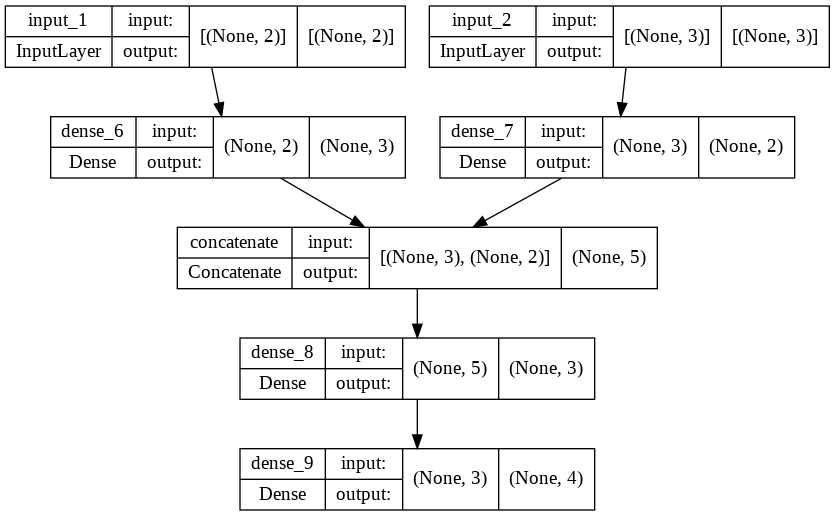

In [39]:
model = get_model()
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

## Subclassing model directly

In [40]:
class MySubclassedModel(tf.keras.Model):
    def __init__(self):
        super().__init__() # Calling super().__init__ in order to base our custom model on the tf.keras.Model class.
        self.sequential_1 = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation="relu"),
            tf.keras.layers.Dense(3, activation="relu")
        ]) # Defining layers in __init__
        self.sequential_2 = tf.keras.Sequential([
            tf.keras.layers.Dense(8, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu")
        ]) # Defining layers in __init__
        self.sequential_3 = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation="relu"),
            tf.keras.layers.Dense(7)
        ]) # Defining layers in __init__
        self.softmax = tf.keras.layers.Softmax() # Defining layers in __init__
    
    def compile(self, loss, metric, **kwargs): # kwargs is any other keyword arguments
        super().compile(loss=loss, metrics=metric, **kwargs) # Use the default compile
        self.my_metric = metric # Set my metric to be our model's metric.
        self.loss_tracker = tf.keras.metrics.Mean() # Create tracker to track average loss
    
    def call(self, inputs, training=False):
        input1 = inputs["input1"]
        input2 = inputs["input2"]
        d1 = self.sequential_1(input1, training=training)
        d2 = self.sequential_2(input2, training=training)
        c = tf.concat([d1, d2], axis=-1) # You can also use differentiable tf functions such as tf.concat
        d3 = self.sequential_3(c, training=training) # Call the layers created in __init__
        s = self.softmax(d3)
        return s
    
    def train_step(self, inputs):
        with tf.GradientTape() as tape: # Using tf.GradientTape to calculate gradients. What this does is it tracks the gradients of your model's computation graph through the different layers and functions, so at the end, you can use the "tape" to calculate the gradients for your model's variables.
            # Input preprocessing here
            output = self(inputs, training=True) # Call the model
            # Output postprocessing here
            loss = self.loss.call(inputs["label"], output) # Calculate the loss
        gradients = tape.gradient(loss, self.trainable_variables) # Calculate the gradients
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables)) # Use the optimizer to apply the gradients
        self.loss_tracker.update_state(loss) # Update the loss tracker
        self.my_metric.update_state(inputs["label"], output) # Update the metric
        return {"loss": self.loss_tracker.result(), "metric": self.my_metric.result()} # Return the loss and metric for printing
    
    def test_step(self, inputs): # Almost the same as train_step, but with no gradients.
        # Input preprocessing here
        output = self(inputs, training=False) # Call the model
        # Output postprocessing here
        loss = self.loss.call(inputs["label"], output) # Calculate the loss
        self.loss_tracker.update_state(loss) # Update the loss tracker
        self.my_metric.update_state(inputs["label"], output) # Update the metric
        return {"loss": self.loss_tracker.result(), "metric": self.my_metric.result()} # Return the loss and metric for printing
    
    def predict_step(self, inputs):
        # Input preprocessing here
        output = self(inputs, training=False) # Call the model
        # Output postprocessing here
        return output # Return the result directly
    
    @property # Decorator
    def metrics(self):
        return [self.loss_tracker, self.my_metric] # These are the metrics that we want TensorFlow to reset between train and validation, as well as between epochs.

In [41]:
model = MySubclassedModel()

# Defining your loss

In [42]:
my_loss = tf.keras.losses.BinaryCrossentropy()

In [43]:
class MyLoss(tf.keras.losses.Loss):
    def __init__(self, loss_weight=1.0, name="my_loss"):
        super().__init__()
        self.loss_weight = loss_weight
        self.name = name
    
    def call(self, ground_truth, predictions):
        """
        Parameters:
            ground_truth: tf tensor of shape (B, K)
            predictions: tf tensor of shape (B, K)
        Returns:
            tf tensor of shape (B,)
        """
        return tf.reduce_mean((ground_truth-predictions)**2, axis=-1)*self.loss_weight

In [44]:
# Create loss
my_loss = MyLoss(loss_weight=3.0)

# Callbacks

In [45]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("model_weights/my_model_epoch_{epoch}_val_loss_{val_loss}.hdf5", save_weights_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3)
]

# Examples

In [46]:
epochs = 100 # Fill in epochs here

## Logistic Regression

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation="sigmoid")]) # Define a model
loss = tf.keras.losses.BinaryCrossentropy() # Define BCE loss function
X = tf.constant("---Fill in dataset here---") # X (input)
Y = tf.constant("---Fill in dataset here---") # Y (output)
model.compile(optimizer="adam", loss=loss) # compile with optimizer and loss
model.fit(X, Y, epochs=epochs, batch_size=32) # Fit model: replace epochs with actual number

## Linear Regression

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) # Define model
loss = tf.keras.losses.MeanSquaredError() # Mean Squared Error loss function
X = tf.constant("---Fill in dataset here---") # X (input)
Y = tf.constant("---Fill in dataset here---") # Y (output)
model.compile(optimizer="adam", loss=loss) # compile model with optimizer and loss
model.fit(X, Y, epochs=epochs, batch_size=32) # fit model: replace epochs with actual number